# Trabalho Prático - Introdução à Ciência de Dados

**Alunos:**
1.   Evaldo Martins de Souza - 2019094163
2.   Lorrayne Somerlattedos Santos - 2018065895
3.   Lucas Xavier Veneroso - 2016065138

Dataset: [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db/code)

## **[Vídeo](https://youtu.be/0y_cCK9msIE) de Apresentação**

# **Introdução**

Nesse projeto iremos prever a popularidade de músicas de acordo com suas notas musicais, dançabilidade e acústica. Para isso, usaremos a base de dados Spotify Tracks DB, disponível no Kaggle.

A definição dos features estão disponíveis na página [Spotify for Developers](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features)



### Packages

In [32]:
import numpy as np 
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

### Carregando e visualizando Spotify Tracks DB

Checando as estatísticas gerais

In [33]:
spotify = 'https://raw.githubusercontent.com/somerlatte/DataScience/main/SpotifyFeatures.csv'
dataframe = pd.read_csv(spotify)

In [34]:
dataframe.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [35]:
dataframe.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [36]:
print(dataframe.keys())

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


### Checando valores nulos (NaN)

In [37]:
pd.isnull(dataframe).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Como é possível visualizar, não existem valores nulos. Felizmente, não precisamos preencher nenhuma informação.

# Análise Exploratória

Agora iremos checar têndencias no nosso dataset para vermos quais variáveis possuem correlação.

Text(0.5, 1.0, 'DIstribuição de Popularidade')

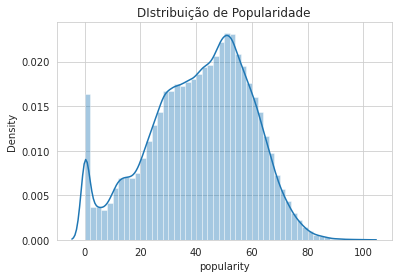

In [38]:
sns.distplot(dataframe['popularity']).set_title('DIstribuição de Popularidade')

In [39]:
dataframe.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857


Text(0.5, 1.0, 'Popularidade de Acordo com Notas Musicais')

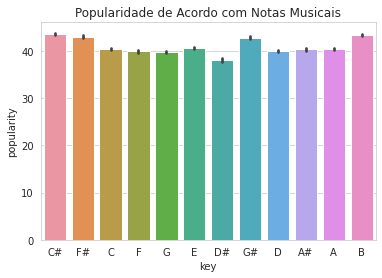

In [40]:
sns.barplot(x = 'key', y = 'popularity', data = dataframe)
plt.title('Popularidade de Acordo com Notas Musicais')

Text(0.5, 1.0, 'Popularidade de Acordo com o Acorde')

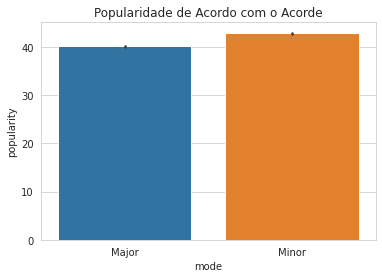

In [41]:
sns.barplot(x = 'mode', y = 'popularity', data = dataframe)
plt.title('Popularidade de Acordo com o Acorde')

Text(0.5, 1.0, 'Popularidade de Acordo com o Compasso Musical')

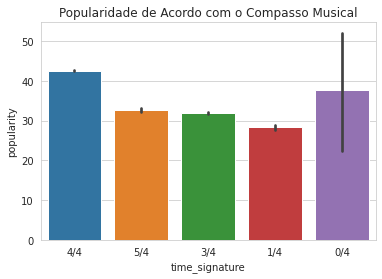

In [42]:
sns.barplot(x = 'time_signature', y = 'popularity', data = dataframe)
plt.title('Popularidade de Acordo com o Compasso Musical')

Acorde e Nota são duas coisas que se relacionam, já que existe B maior e B menor, por exemplo. Portanto, iremos combinar esses dois features em um novo gráfico.

Text(0.5, 1.0, 'Popularidade de Acordo com Acorde e Nota')

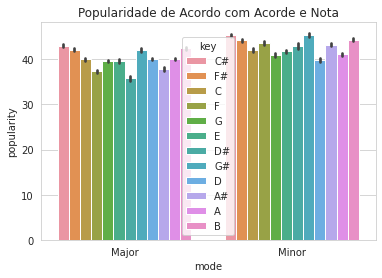

In [43]:
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = dataframe)
plt.title('Popularidade de Acordo com Acorde e Nota')

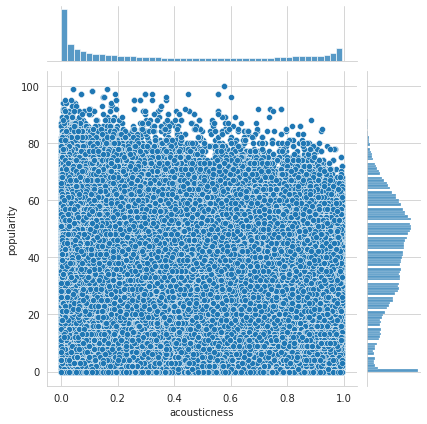

In [44]:
sns.jointplot(x = 'acousticness', y = 'popularity', data = dataframe)

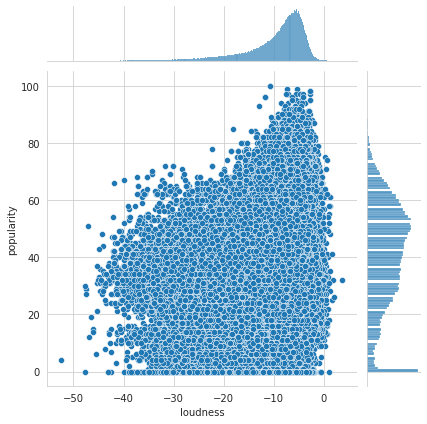

In [45]:
sns.jointplot(x = 'loudness', y = 'popularity', data = dataframe)

Text(0.5, 1.0, 'Acústica de músicas com Popularidade acima de 50')

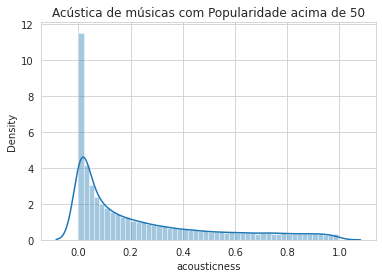

In [46]:
acima_50 = dataframe[dataframe.popularity > 50]
sns.distplot(acima_50['acousticness'])
plt.title('Acústica de músicas com Popularidade acima de 50')

Text(0.5, 1.0, 'Acústica de músicas com Popularidade abaixo de 50')

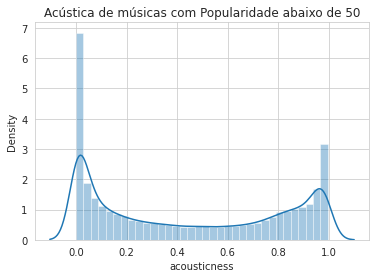

In [47]:
abaixo_50 = dataframe[dataframe.popularity < 50]
sns.distplot(abaixo_50['acousticness'])
plt.title('Acústica de músicas com Popularidade abaixo de 50')

Text(0.5, 1.0, 'Volume de músicas com Popularidade acima de 50')

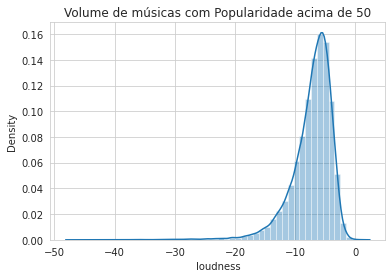

In [48]:
sns.distplot(acima_50['loudness'])
plt.title('Volume de músicas com Popularidade acima de 50')

Text(0.5, 1.0, 'Volume de músicas com Popularidade abaixo de 50')

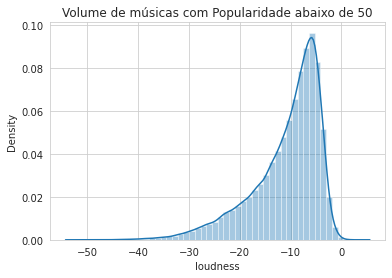

In [49]:
sns.distplot(abaixo_50['loudness'])
plt.title('Volume de músicas com Popularidade abaixo de 50')

Pela análise, Volume e Acústica não tem um influência tão forte na popularidade das músicas. 

# Modificando alguns features

As variáveis Key, mode e time signature (nota, acorde e compasso) estão em texto e precisam virar número para que possam ser trabalhadas. Popularity (popularidade) irá ser um número binário, com popularidade acima de 57 sendo músicas populares e abaixo disso sendo não populares. Populares serão 1 e não populares 0.

**Notas**: Como existem 12 notas sem distinção de acorde, converteremos A em 0, A# em 1 e assim por diante até que B seja 12.

In [50]:
notas_musicais = dataframe['key'].unique()
for i in range(len(notas_musicais)):
    dataframe.loc[dataframe['key'] == notas_musicais[i], 'key'] = i
dataframe.sample(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
129252,Classical,Steve Reich,Different Trains: After The War,3EKtHDM9mPtnbsh8de5KEd,26,0.95000,0.322,628573,0.148,0.464000,2,0.1140,-21.468,Minor,0.0675,184.431,4/4,0.480
67905,Hip-Hop,Drake,Big Rings,7jslhIiELQkgW9IHeYNOWE,64,0.00196,0.776,217707,0.675,0.000000,7,0.2270,-6.224,Minor,0.2660,131.984,4/4,0.271
51371,Blues,Lee Dorsey,A Lover Was Born,7KtjFntAETV1dTHztkg2ZF,33,0.34600,0.775,174600,0.601,0.001270,9,0.0483,-7.223,Minor,0.0445,93.246,4/4,0.926
116134,Rap,Bryce Vine,On the Ball,03F0kSuBhDgD2zWlAwkG8x,59,0.12500,0.674,190704,0.740,0.000011,8,0.1920,-5.646,Major,0.0380,145.959,4/4,0.531
828,Country,Tech N9ne Collabos,Midwest Choppers 2,6y3TijXC2R53WYv1CuOTzt,45,0.18500,0.685,274307,0.939,0.000000,0,0.7710,-2.134,Major,0.1880,139.953,4/4,0.395
191421,Ska,The Briggs,Let Them Know,5Ovkf18kctvvUH35CGOrVM,16,0.01920,0.367,186187,0.949,0.000000,10,0.3710,-2.610,Major,0.0782,197.746,4/4,0.671
136872,Reggae,The Hip Abduction,Before We Lose Our Mind - Live,2Let0pA02qDg3bxukfc1VE,22,0.03070,0.605,218947,0.788,0.000166,0,0.5900,-7.130,Minor,0.0377,121.951,4/4,0.596
103100,Children’s Music,Bear Hands,Back Seat Driver (Spirit Guide),3shsLlt2L5dyInhG3cewKH,47,0.09690,0.544,229000,0.784,0.001940,2,0.1030,-4.948,Major,0.0445,89.002,4/4,0.433
90821,Hip-Hop,Atmosphere,Jerome,0EghBAr8QvcCyZG9LuOB6h,47,0.03030,0.686,255773,0.829,0.000254,10,0.1580,-6.804,Major,0.1370,97.531,4/4,0.128
145739,Jazz,Art Blakey,Moanin',4Vkk3iD1VrENHJEACNddvt,58,0.80400,0.612,570720,0.493,0.266000,3,0.2020,-8.589,Minor,0.0467,126.358,4/4,0.484


**Acordes**: Maior = 1 e Menor = 0.

In [51]:
dataframe.loc[dataframe["mode"] == 'Major', "mode"] = 1
dataframe.loc[dataframe["mode"] == 'Minor', "mode"] = 0
dataframe.sample(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
122729,Reggae,Rebelution,Bump,2FiP4DaoyUI6mcYat1hlM2,47,0.000920,0.708,323440,0.540,0.007710,8,0.0681,-6.829,1,0.0432,150.882,4/4,0.6660
208315,World,Hillsong UNITED,Captain - Live,2szPIlsbHL8Hy4OHe6TfNE,42,0.555000,0.446,383840,0.314,0.000012,3,0.1370,-12.109,1,0.0348,125.099,3/4,0.1200
116982,Rap,Kanye West,Barry Bonds,7kXINLuqpicfE1sDCZ3Xwv,54,0.045200,0.475,204307,0.613,0.000000,0,0.2940,-6.217,1,0.3820,166.755,4/4,0.7180
153658,Rock,Vance Joy,Alone With Me,3BWlLiQSXXxy3OpL59k7lN,57,0.108000,0.625,266627,0.527,0.002910,0,0.1060,-6.449,0,0.0331,141.963,4/4,0.0477
10048,Alternative,Cautious Clay,SETTLER'S PARADISE,5zmGr8hRQ6W9arZy9e07GL,47,0.561000,0.657,175366,0.599,0.000005,3,0.1310,-8.060,0,0.0516,132.103,4/4,0.5960
35375,Anime,Capcom Sound Team,GET A WEAPON / BOSS ATTACK RESULT,4SpRG3VCmBPQFwhUKvxK4y,12,0.000606,0.506,39480,0.784,0.801000,11,0.3270,-8.722,0,0.0456,149.662,4/4,0.9440
136223,Reggae,Vybz Kartel,Hey Addi,6cYlMnv5130dEozyH1PJ0c,30,0.151000,0.668,164000,0.644,0.000000,4,0.4720,-6.601,1,0.4410,91.136,4/4,0.8470
155178,Rock,Yoke Lore,Beige (unburdened),5dJvISvgxPCxmMPIq5WNhv,46,0.826000,0.377,196493,0.296,0.000010,9,0.0930,-9.815,1,0.0902,80.130,4/4,0.2430
211084,World,Capital City Music,O Praise the Name (Anastasis) [feat. Jacob Can...,2zSS5MPDIUQdcvZcc1JCXG,30,0.317000,0.347,325395,0.460,0.000002,2,0.4540,-8.042,1,0.0320,144.657,4/4,0.0851
92107,Hip-Hop,CeeLo Green,Bright Lights Bigger City,2zT5npcA5n2RhhnBiWg3zo,47,0.000282,0.632,218280,0.749,0.000013,5,0.7300,-5.125,1,0.0294,108.994,4/4,0.7020


In [52]:
compassos = dataframe['time_signature'].unique()
for i in range(len(compassos)):
    dataframe.loc[dataframe['time_signature'] == compassos[i], 'time_signature'] = i
dataframe.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
133948,Reggae,Bunny Wailer,Blackheart Man,6xIJylzwCbqP7hy0ekZz2d,34,0.7200,0.786,377267,0.451,0.075000,8,0.1550,-13.090,1,0.3520,148.888,0,0.8530
201999,Soundtrack,Junkie XL,Escape,6SoSCS4Jk3Do17eaiVkQCP,34,0.0581,0.140,134229,0.628,0.847000,0,0.1080,-11.759,1,0.0800,93.911,2,0.0656
178160,Jazz,Thelonious Monk,Smoke Gets In Your Eyes,62PG5q6b8NAKeXtHljoM5V,32,0.9910,0.503,203333,0.159,0.884000,7,0.1600,-15.500,1,0.0509,79.095,0,0.5130
109856,Pop,Twenty One Pilots,Lane Boy,2P61EK6DMGyVyssLWS4fKy,73,0.0573,0.616,253093,0.811,0.000016,4,0.0566,-4.804,1,0.0626,159.929,0,0.9130
140849,Indie,The Avett Brothers,Paranoia in B Major,3G87VjDnNPFBN0m97qYIea,49,0.2320,0.540,217840,0.556,0.000008,9,0.1430,-6.822,1,0.0423,123.361,0,0.3860


**Popularidade**

In [53]:
dataframe.loc[dataframe['popularity'] < 57, 'popularity'] = 0 
dataframe.loc[dataframe['popularity'] >= 57, 'popularity'] = 1
dataframe.loc[dataframe['popularity'] == 1]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
135,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.08300,0.724,246333,0.689,0.000000,8,0.3040,-5.922,0,0.1350,146.496,0,0.6930
136,R&B,Rihanna,Desperado,6KFaHC9G178beAp7P0Vi5S,1,0.32300,0.685,186467,0.610,0.000000,2,0.1020,-5.221,0,0.0439,94.384,2,0.3230
137,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,1,0.06750,0.762,199520,0.520,0.000004,3,0.1140,-5.237,0,0.0959,75.047,0,0.0862
138,R&B,Surfaces,Heaven Falls / Fall on Me,7yHqOZfsXYlicyoMt62yC6,1,0.36000,0.563,240597,0.366,0.002430,11,0.0955,-6.896,0,0.1210,85.352,0,0.7680
139,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,1,0.59600,0.653,213947,0.621,0.000000,11,0.0811,-5.721,0,0.0409,100.006,0,0.4660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230312,Soul,James Brown,Get Up (I Feel Like Being A) Sex Machine - Pts...,6hpmTwgNCz81H2bFEREx29,1,0.27300,0.833,318800,0.661,0.000149,9,0.2940,-7.595,0,0.1010,108.314,0,0.8580
230782,Soul,Alex Hepburn,If You Stay,4sJoIeb8zWYCLHSLM0az3b,1,0.04530,0.719,194554,0.702,0.000013,11,0.0662,-4.577,1,0.0357,116.938,0,0.6130
230817,Soul,Paloma Faith,Make Your Own Kind of Music,5jsFFhABp2FkasGr4QcQd6,1,0.00862,0.567,163840,0.753,0.001830,5,0.1270,-4.823,1,0.0406,120.098,0,0.5660
230946,Soul,James Brown,Papa's Got A Brand New Bag - Pt. 1,5aZzmPUv5a2nna9sxBrmpL,1,0.51900,0.775,128973,0.725,0.054100,5,0.0944,-8.369,1,0.0944,129.681,0,0.9140


# Previsão de Modelos

Como estudado, vamos usar alguns modelos de previsão para analisar e prever a semelhança das músicas.

### Packages

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## Features

In [55]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]

## Training and Testing

Vamos definir 80% da base de dadospara treinar e 20% para testar.

In [56]:
training = dataframe.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = dataframe.drop(training.index)[features]

Usamos train_test_split para fazer o validation.

In [57]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

### Logistic Regression

In [58]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

Accuracy: 0.7895316360511333


### Random Forest Classifier

In [59]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

Accuracy: 0.9215275539800193


### K-Nearest Neighbors Classifier (KNN)

In [60]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

Accuracy: 0.7735524760983994


## Resumo do desempenho dos modelos

In [61]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier'],
                                            'Accuracy': [LR_Accuracy,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy]})

In [62]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
1,RandomForestClassifier,0.921528
0,LogisticRegression,0.789532
2,KNeighborsClassifier,0.773552


# Conclusão

Usando somente features que tratam de questões de audio da música, conseguimos prever a popularidade de músicas sem influência de fatores externos, como artista ou gênero musical. O Random Forest Classifier se mostrou o melhor teste, com 92% de acuracia.

# Referências


1.  [Song Popularity Predictor Mohamed Nasreldin-Mohamed Nasreldin](https://towardsdatascience.com/song-popularity-predictor-1ef69735e380)
2.  [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db)

